# Feature Extraction with Scale-Invariant Feature Transform (SIFT)

In [12]:
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
sift = cv2.SIFT_create() # SIFT object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # matcher

C:\Users\fongc\AppData\Local\Temp\ipykernel_17540\3764939643.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


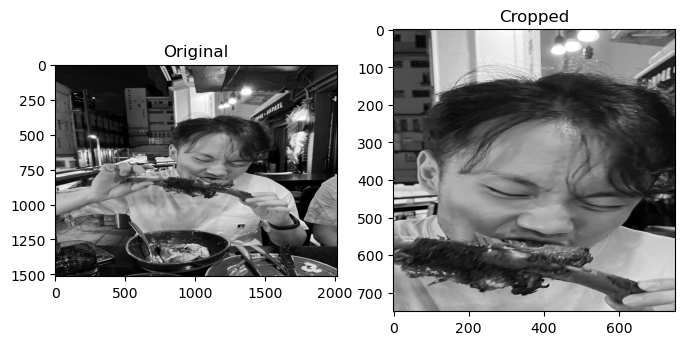

In [29]:
im1 = cv2.resize(cv2.cvtColor(cv2.imread("sam.png"), cv2.COLOR_BGR2GRAY), (2016, 1512), interpolation=cv2.INTER_AREA)
im2 = cv2.resize(cv2.cvtColor(cv2.imread("sam.png"), cv2.COLOR_BGR2GRAY), (2016, 1512), interpolation=cv2.INTER_AREA)[250:1000, 750:1500]
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes[0].imshow(im1, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(im2, cmap="gray")
axes[1].set_title("Cropped")
fig.show()

In [30]:
# compute SIFT features
kp1, desc1 = sift.detectAndCompute(im1, None)
kp2, desc2 = sift.detectAndCompute(im2, None)

# match
matches = sorted(bf.match(desc1, desc2), key=lambda x: x.distance)

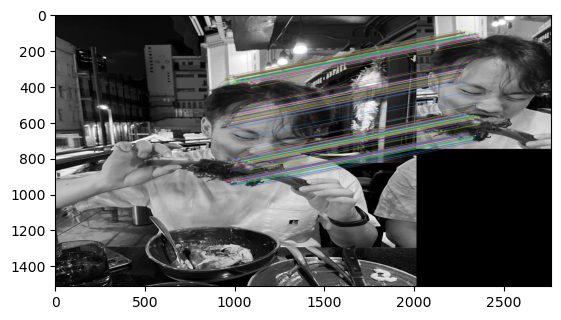

In [31]:
im3 = cv2.drawMatches(im1, kp1, im2, kp2, matches[300:600], im2, flags=2)
plt.imshow(im3, cmap="gray")